<a href="https://www.kaggle.com/code/karnangopalakrishnan/hdfcbank-prediction?scriptVersionId=128241825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hdfc-data/HDFC.csv


In [2]:
 pip install pandas-ta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=2702618ba1c8d5db66d1e63406d881b896902c1ffbcab65c423933d53942a5b5
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
Note: you may need to restart the kernel to use updated packages.


In [3]:
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib

In [4]:
# pip install stock-analysis-engine

In [5]:
# import talib as tb
# import analysis_engine.ae_talib as ae_talib

In [6]:
import pandas_ta as ta
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("/kaggle/input/hdfc-data/HDFC.csv")
data.head()


,Open,High,Low,Close,Adj Close,Volume
0,214.449997,214.899994,209.750000,213.425003,197.498627,3514998
1,215.699997,220.449997,215.000000,219.574997,203.189667,3439238
2,220.949997,222.475006,215.425003,221.649994,205.109802,4871478
3,222.000000,223.350006,220.149994,221.824997,205.271759,3380606
4,220.500000,228.574997,219.475006,226.649994,209.736710,3977222


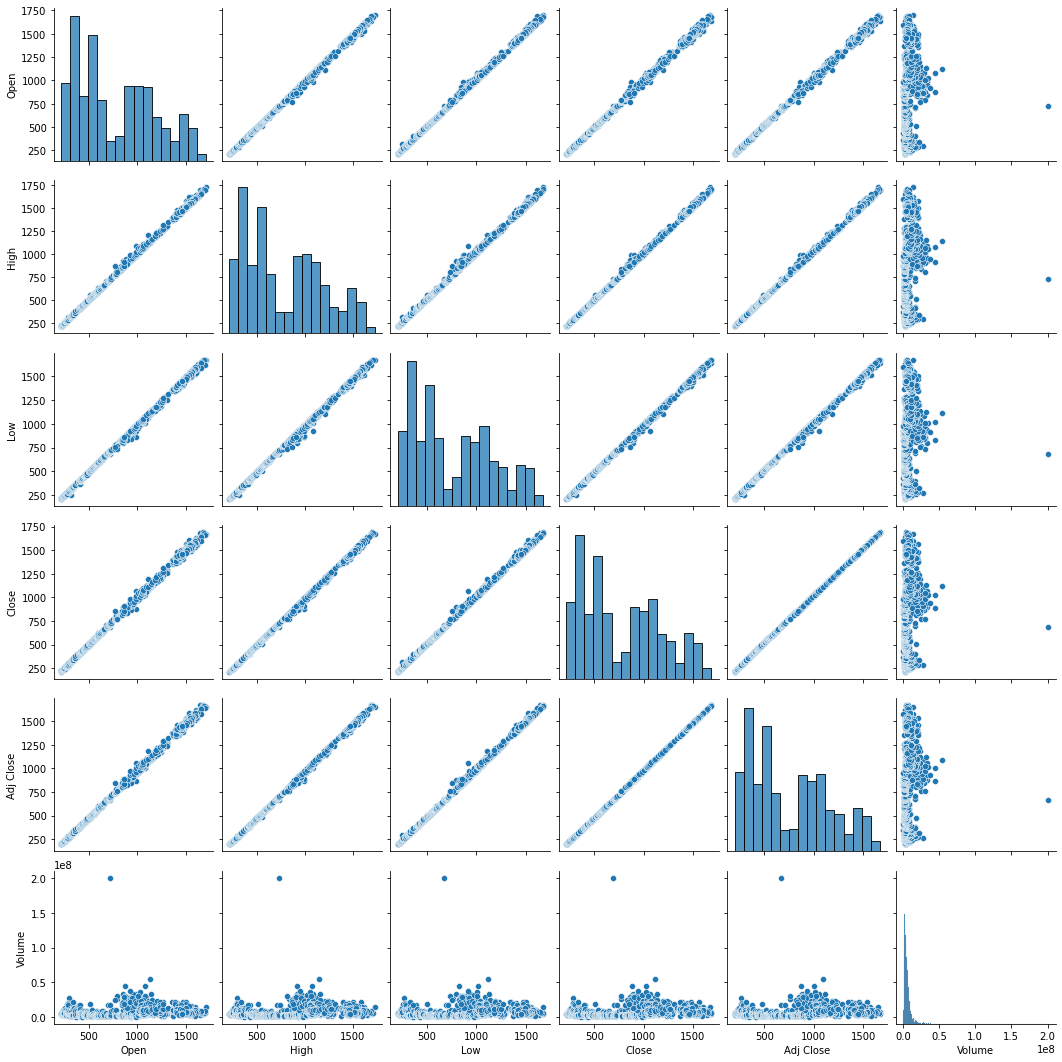

In [7]:
sns.pairplot(data)
plt.show()

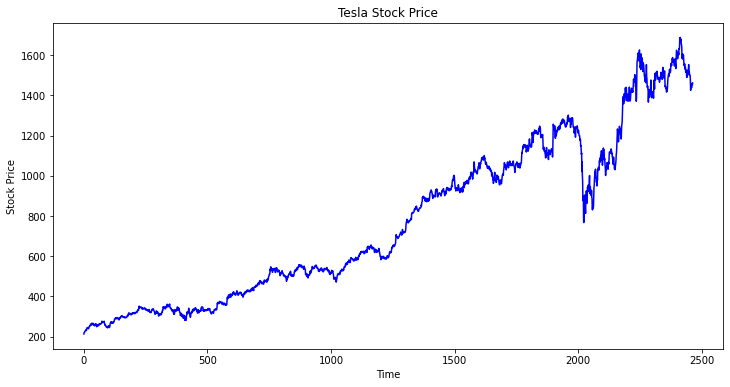

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data["Close"],color="blue");
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

In [9]:
bb = ta.bbands(data['Close'], length=20,std=2)
data = pd.concat([data, bb], axis=1).reindex(data.index)
data

,Open,High,Low,Close,Adj Close,Volume,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
0,214.449997,214.899994,209.750000,213.425003,197.498627,3514998,NaN,NaN,NaN,NaN,NaN
1,215.699997,220.449997,215.000000,219.574997,203.189667,3439238,NaN,NaN,NaN,NaN,NaN
2,220.949997,222.475006,215.425003,221.649994,205.109802,4871478,NaN,NaN,NaN,NaN,NaN
3,222.000000,223.350006,220.149994,221.824997,205.271759,3380606,NaN,NaN,NaN,NaN,NaN
4,220.500000,228.574997,219.475006,226.649994,209.736710,3977222,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2459,1445.500000,1452.000000,1428.000000,1438.900024,1422.362183,2780512,1423.014512,1492.692511,1562.370510,9.335881,0.113992
2460,1428.900024,1454.000000,1422.150024,1450.800049,1434.125488,2352549,1418.295671,1490.170013,1562.044356,9.646462,0.226119
2461,1460.699951,1466.900024,1453.400024,1460.800049,1444.010498,2725339,1415.556972,1488.532513,1561.508054,9.805032,0.309988
2462,1456.050049,1461.000000,1447.400024,1453.849976,1437.140259,3834351,1411.909828,1485.992511,1560.075194,9.970802,0.283063


In [10]:
# data.dropna(inplace=True)
# bb.dropna(inplace=True)
# bb

data['BBL_20_2.0'] = data['BBL_20_2.0'].fillna(0)
data['BBM_20_2.0'] = data['BBM_20_2.0'].fillna(0)
data['BBU_20_2.0'] = data['BBU_20_2.0'].fillna(0)
data['BBB_20_2.0'] = data['BBB_20_2.0'].fillna(0)
data['BBP_20_2.0'] = data['BBP_20_2.0'].fillna(0)
data

,Open,High,Low,Close,Adj Close,Volume,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
0,214.449997,214.899994,209.750000,213.425003,197.498627,3514998,0.000000,0.000000,0.000000,0.000000,0.000000
1,215.699997,220.449997,215.000000,219.574997,203.189667,3439238,0.000000,0.000000,0.000000,0.000000,0.000000
2,220.949997,222.475006,215.425003,221.649994,205.109802,4871478,0.000000,0.000000,0.000000,0.000000,0.000000
3,222.000000,223.350006,220.149994,221.824997,205.271759,3380606,0.000000,0.000000,0.000000,0.000000,0.000000
4,220.500000,228.574997,219.475006,226.649994,209.736710,3977222,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2459,1445.500000,1452.000000,1428.000000,1438.900024,1422.362183,2780512,1423.014512,1492.692511,1562.370510,9.335881,0.113992
2460,1428.900024,1454.000000,1422.150024,1450.800049,1434.125488,2352549,1418.295671,1490.170013,1562.044356,9.646462,0.226119
2461,1460.699951,1466.900024,1453.400024,1460.800049,1444.010498,2725339,1415.556972,1488.532513,1561.508054,9.805032,0.309988
2462,1456.050049,1461.000000,1447.400024,1453.849976,1437.140259,3834351,1411.909828,1485.992511,1560.075194,9.970802,0.283063


In [11]:
# c = data['Close'].values
# close=data['Close']
# data['RSI']=data.ta.rsi(length=14)
# data['SMA 10'] = data.ta.sma(10)
# data['SMA 50'] = data.ta.sma(50)
# data['SMA 100'] = data.ta.sma(100)
# ae_talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0, verbose=False)
# (upperband, middleband,lowerband) = BBANDS(close,timeperiod=5,nbdevup=2,nbdevdn=2,
#     matype=0)
# print(tb.MA(c, timeperiod=5).mean())
# data['MA5'] = tb.MA(c, timeperiod=5) / tb.MA(c, timeperiod=5).mean()
# data['BBANDS_U'] = tb.BBANDS(c, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[0] / \
#                          tb.BBANDS(c, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[0].mean()
# data['BBANDS_M'] = tb.BBANDS(c, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[1] / \
#                          tb.BBANDS(c, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[1].mean()
# data['BBANDS_L'] = tb.BBANDS(c, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[2] / \
#                          tb.BBANDS(c, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[2].mean()
# currunt_close = data["Close"]

# currunt_close.ta.bbands(close='Close', length=20, std=2, append=True)
# pd.set_option("display.max_columns", None)  # show all columns

# def myRSI(price, n=20):
#     delta =price['close'].diff()
#     dUp,dDown = delta.copy(),delta.copy()
#     dUp[dUp<0]=0
    
#     RolUp = dUp.rolling(window=n).mean()
#     RolDown =dDown.rolling(window=n).mean.abs()
    
#     RS=RolUp/RolDown
#     rsi=100.0-(100.0/(1.0+RS))
#     return rsi

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2464 entries, 0 to 2463
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2464 non-null   float64
 1   High        2464 non-null   float64
 2   Low         2464 non-null   float64
 3   Close       2464 non-null   float64
 4   Adj Close   2464 non-null   float64
 5   Volume      2464 non-null   int64  
 6   BBL_20_2.0  2464 non-null   float64
 7   BBM_20_2.0  2464 non-null   float64
 8   BBU_20_2.0  2464 non-null   float64
 9   BBB_20_2.0  2464 non-null   float64
 10  BBP_20_2.0  2464 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 211.9 KB


In [13]:

data.describe() 

,Open,High,Low,Close,Adj Close,Volume,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
count,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2.464000e+03,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000
mean,774.347453,781.469683,766.387166,774.081859,751.538158,5.931413e+06,734.407941,767.554783,800.701626,8.509292,0.572429
std,401.806180,405.345126,397.608215,401.348752,401.363089,6.312445e+06,385.115215,402.668431,421.871016,5.570481,0.330194
min,214.449997,214.899994,209.750000,213.425003,197.498627,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.335724
25%,411.150009,415.637505,407.000000,410.762497,389.110252,2.766310e+06,396.401643,411.218751,424.057835,4.980427,0.310914
50%,643.324982,647.500000,639.262512,643.350006,619.802887,4.423167e+06,617.821693,636.790625,655.244202,7.125283,0.623024
75%,1069.243744,1078.662537,1057.837494,1067.987549,1047.066895,7.153182e+06,1026.374693,1070.903746,1128.693159,10.508818,0.832082
max,1705.000000,1725.000000,1671.000000,1688.699951,1669.291016,2.011300e+08,1569.819567,1637.232507,1716.653405,55.386663,1.395165


In [14]:
data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
BBL_20_2.0    0
BBM_20_2.0    0
BBU_20_2.0    0
BBB_20_2.0    0
BBP_20_2.0    0
dtype: int64

In [15]:
x=data.drop('Close',axis=1).values   #input
y=data[['Close']].values   #output

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=101)

In [17]:
#using linear regression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [18]:
lm.coef_

array([[-1.63044823e-01,  2.46083556e-01,  2.24590031e-01,
         6.81744883e-01, -9.38240874e-08, -1.59825376e-03,
         3.46060939e-03,  8.51947254e-03, -1.85704056e-01,
         3.15961145e+00]])

In [19]:
predictions = lm.predict(x_test)

In [20]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.999957007258519

In [21]:
dframe=pd.DataFrame({'actual':y_test.flatten(),'Predicted':predictions.flatten()})

In [22]:
dframe.head(15)

,actual,Predicted
0,483.524994,483.753992
1,319.774994,322.258136
2,1143.025024,1145.928369
3,1093.050049,1091.302220
4,321.125000,323.468599
5,333.100006,336.007286
6,1093.875000,1097.982588
7,1581.449951,1585.618215
8,999.450012,998.992076
9,546.075012,546.955538


Text(0, 0.5, 'Closing price')

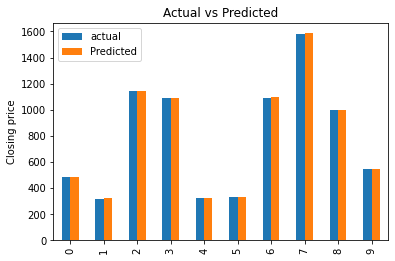

In [23]:
graph =dframe.head(10)
graph.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.ylabel('Closing price')

Text(0, 0.5, 'Predicted')

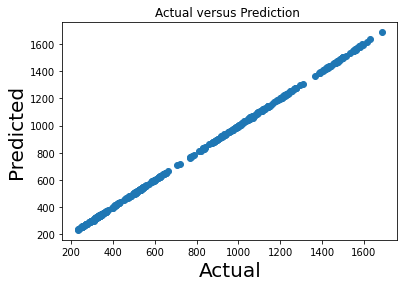

In [24]:
#using scatter plot compare the actual and predicted data
fig = plt.figure()
plt.scatter(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)    

In [25]:
import math
from sklearn import metrics

In [26]:
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Abs value: 2.0432336897100742
Mean squared value: 7.035812377134817
root mean squared error value: 2.652510580023163


In [27]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)


DecisionTreeRegressor()

In [28]:
dt_predictions = dt.predict(x_test)

In [29]:
r2_score(y_test, dt_predictions)

0.9999100766869313

In [30]:
dt_dframe=pd.DataFrame({'actual':y_test.flatten(),'Predicted':dt_predictions.flatten()})
dt_dframe.head(15)

,actual,Predicted
0,483.524994,480.500000
1,319.774994,319.500000
2,1143.025024,1151.400024
3,1093.050049,1094.525024
4,321.125000,321.524994
5,333.100006,335.174988
6,1093.875000,1093.650024
7,1581.449951,1586.849976
8,999.450012,1001.000000
9,546.075012,545.750000


In [31]:
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,dt_predictions))
print('Mean squared value:',metrics.mean_squared_error(y_test,dt_predictions))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,dt_predictions)))

Mean Abs value: 2.2369154800507887
Mean squared value: 14.716055252295993
root mean squared error value: 3.8361510987311216
